At weightlifting competitions, men and women compete separately.  Each gender is further divided into bodyweight classes.  Rankings are determined within the gender and bodyweight categories by total amount of weight lifted.

The categories exist because a female weighing 87 kg can lift more than a female weighing 55 kg.  The heavier female has more muscle mass than the lighter female; the amount of weight a person can lift scales with muscle mass.  Furthermore, a male weighing 87 kg can lift more than a female weighing 87 kg.

The categories must exist only if the ranking metric is total amount of weight lifted.

Work done at the Alberta Weightlifting Association has resulted in empirical functions used to calculate the maximum weight lifted as a function of bodyweight.  World record lifts establish these functions.  (A cautionary note: because world records change, so do these functions.)  The function for males is very different from the function for females.  The following notebook presents an exercise in using *two* quantities for the ranking metric: 1) total (i.e., snatch + clean and jerk) amount of weight lifted; and 2) the world record for the athlete's gender and bodyweight.

Ranking by the ratio of total to maximum weight lifted obviates both gender and bodyweight categories.  Men and women can compete directly (with the caveats shown below) and without regard to bodyweight.

For now, the functions defining the maximum weights require that the athlete's gender is known.  My hope is that one day a person professionally studying these metrics will find a replacement variable for gender.

I'm presenting a ranking based on the results of the 2018 IWF World Championships.  Scroll down for detailed results and more information on existing ranking inconsistencies among several gender and weight classes.

A few summary statistics for the top 20 lifters:

1) 5 are female and 15 are male.

2) The median bodyweight is 81 kg.  The minimum bodyweight is 48 kg and the maximum is 169 kg.

3) There are 9 `upsets'.  There are 10 bodyweight classes for each of the 2 genders, meaning that, by the original metric of total weight lifted, there are 20 first-place lifters.  For the new metric, the top 20 lifters are populated by 11 of the first-place lifters and 9 of the second- and third-place lifters.

4) The cutoff `Sinclair fraction', or the ratio of total to maximum weight lifted, is 0.9580.

5) Differences in the Sinclair fraction can be quite small.  The first and second lifters are separated by 0.0136, while the second and third lifters are separated by 0.000064.  Someone who studies ranking metrics professionally should decide when to call these small differences a tie, and what metric to resort to as a second ranking.  (Perhaps ratio of snatch to clean and jerk?)

And an oddity:

I tried to reproduce the rankings by the original metric.  According to IWF literature, ties are resolved by ranking by descending total weight lifted, then by ascending clean and jerk (or, equivalently, by descending snatch), then by ascending attempt number for the successful clean and jerk.  I found 20 inconsistencies.  For example:

name, rank, gender, bodyweight class, c+j weight, attempt number

AL-HUSSEIN Ahmed Farooq Ghulam, 21.0, M, 81, 185.0, 2.0

GETTS Victor, 22.0, M, 81, 180.0, 1.0

QERIMAJ Erkand, 23.0, M, 81, 180.0, 1.0

All 3 lifters have the same total.  My understanding of the literature is that Getts and Qerimaj, who jerked less and snatched more than Al-Hussein, should rank higher than Al-Hussein.  Please follow up with me if you know the solution to this inconsistency.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF as ecdf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Results.csv', sep = ';', na_values = '---')

In [3]:
data

,pid,gender,rank,rank_s,rank_cj,name,born,nation,category,bweight,...,snatch2,snatch3,snatch,jerk1,jerk2,jerk3,jerk,total,event,date
0,0,W,1.0,1.0,1.0,SUKCHAROEN Thunya,21.04.1997,THA,45,44.77,...,80.0,NaN,80.0,96.0,100.0,106.0,106.0,186,2018 IWF World Championships,11.2018
1,1,W,2.0,3.0,2.0,DZHUMABAYEVA Yulduz,22.04.1998,TKM,45,44.90,...,NaN,NaN,75.0,94.0,104.0,NaN,104.0,179,2018 IWF World Championships,11.2018
2,2,W,3.0,2.0,3.0,NANTHAWONG Chiraphan,17.08.1999,THA,45,44.47,...,NaN,NaN,76.0,95.0,NaN,NaN,95.0,171,2018 IWF World Championships,11.2018
3,3,W,4.0,6.0,4.0,ECHANDIA ZARATE Katherin Oriana,14.08.2001,VEN,45,44.97,...,NaN,NaN,67.0,86.0,90.0,NaN,90.0,157,2018 IWF World Championships,11.2018
4,4,W,5.0,4.0,5.0,PAGLIARO Alessandra,16.07.1997,ITA,45,43.22,...,NaN,NaN,70.0,82.0,84.0,86.0,86.0,156,2018 IWF World Championships,11.2018
5,5,W,6.0,5.0,7.0,NGUYEN Thi Thu Trang,03.06.2003,VIE,45,44.93,...,NaN,NaN,70.0,78.0,81.0,NaN,81.0,151,2018 IWF World Championships,11.2018
6,6,W,7.0,7.0,6.0,PANDOVA Daniela Ivanova,16.09.1994,BUL,45,45.00,...,55.0,60.0,60.0,75.0,81.0,NaN,81.0,141,2018 IWF World Championships,11.2018
7,7,W,1.0,4.0,1.0,PRAMONGKHOL Chayuttra,29.11.1994,THA,49,48.23,...,86.0,89.0,89.0,115.0,120.0,NaN,120.0,209,2018 IWF World Championships,11.2018
8,8,W,2.0,2.0,2.0,HOU Zhihui,18.03.1997,CHN,49,48.46,...,NaN,93.0,93.0,108.0,112.0,115.0,115.0,208,2018 IWF World Championships,11.2018
9,9,W,3.0,3.0,3.0,JIANG Huihua,22.01.1998,CHN,49,48.95,...,90.0,92.0,92.0,NaN,108.0,114.0,114.0,206,2018 IWF World Championships,11.2018


In [4]:
sinclair = np.empty(len(data['pid']))
women = data['gender'] == 'W'
wbwhtlog = np.log10(data['bweight'][women]/44.)
aw = -0.78
bw = 0.85
cw = 0.16
sinclair[women] = 140.*10.**(aw*wbwhtlog**2.+bw*wbwhtlog+cw)
men = data['gender'] == 'M'
mbwhtlog = np.log10(data['bweight'][men]/52.)
am = -0.75
bm = 0.79
cm = 0.08
sinclair[men] = 240.*10.**(am*mbwhtlog**2.+bm*mbwhtlog+cm)
sinclair
data = data.assign(sinclair = sinclair)

In [5]:
data = data.assign(sinc_frac = data['total']/sinclair)

In [6]:
data

,pid,gender,rank,rank_s,rank_cj,name,born,nation,category,bweight,...,snatch,jerk1,jerk2,jerk3,jerk,total,event,date,sinclair,sinc_frac
0,0,W,1.0,1.0,1.0,SUKCHAROEN Thunya,21.04.1997,THA,45,44.77,...,80.0,96.0,100.0,106.0,106.0,186,2018 IWF World Championships,11.2018,205.346834,0.905785
1,1,W,2.0,3.0,2.0,DZHUMABAYEVA Yulduz,22.04.1998,TKM,45,44.90,...,75.0,94.0,104.0,NaN,104.0,179,2018 IWF World Championships,11.2018,205.845954,0.869582
2,2,W,3.0,2.0,3.0,NANTHAWONG Chiraphan,17.08.1999,THA,45,44.47,...,76.0,95.0,NaN,NaN,95.0,171,2018 IWF World Championships,11.2018,204.189644,0.837457
3,3,W,4.0,6.0,4.0,ECHANDIA ZARATE Katherin Oriana,14.08.2001,VEN,45,44.97,...,67.0,86.0,90.0,NaN,90.0,157,2018 IWF World Championships,11.2018,206.114128,0.761714
4,4,W,5.0,4.0,5.0,PAGLIARO Alessandra,16.07.1997,ITA,45,43.22,...,70.0,82.0,84.0,86.0,86.0,156,2018 IWF World Championships,11.2018,199.286667,0.782792
5,5,W,6.0,5.0,7.0,NGUYEN Thi Thu Trang,03.06.2003,VIE,45,44.93,...,70.0,78.0,81.0,NaN,81.0,151,2018 IWF World Championships,11.2018,205.960935,0.733149
6,6,W,7.0,7.0,6.0,PANDOVA Daniela Ivanova,16.09.1994,BUL,45,45.00,...,60.0,75.0,81.0,NaN,81.0,141,2018 IWF World Championships,11.2018,206.228935,0.683706
7,7,W,1.0,4.0,1.0,PRAMONGKHOL Chayuttra,29.11.1994,THA,49,48.23,...,89.0,115.0,120.0,NaN,120.0,209,2018 IWF World Championships,11.2018,218.159118,0.958016
8,8,W,2.0,2.0,2.0,HOU Zhihui,18.03.1997,CHN,49,48.46,...,93.0,108.0,112.0,115.0,115.0,208,2018 IWF World Championships,11.2018,218.976633,0.949873
9,9,W,3.0,3.0,3.0,JIANG Huihua,22.01.1998,CHN,49,48.95,...,92.0,NaN,108.0,114.0,114.0,206,2018 IWF World Championships,11.2018,220.704391,0.933375


In [7]:
attempt_num = np.empty(len(data['pid']))
for ind, row in data.iterrows():
    if np.isfinite(row['jerk']) == 1:
        if row['jerk'] == row['jerk1']:
            attempt_num[ind] = 1
        elif row['jerk'] == row['jerk2']:
            attempt_num[ind] = 2
        elif row['jerk'] == row['jerk3']:
            attempt_num[ind] = 3
    elif np.isfinite(row['jerk']) == 0:
        attempt_num[ind] = 0
data = data.assign(cj_attempt_num = attempt_num)
data

,pid,gender,rank,rank_s,rank_cj,name,born,nation,category,bweight,...,jerk1,jerk2,jerk3,jerk,total,event,date,sinclair,sinc_frac,cj_attempt_num
0,0,W,1.0,1.0,1.0,SUKCHAROEN Thunya,21.04.1997,THA,45,44.77,...,96.0,100.0,106.0,106.0,186,2018 IWF World Championships,11.2018,205.346834,0.905785,3.0
1,1,W,2.0,3.0,2.0,DZHUMABAYEVA Yulduz,22.04.1998,TKM,45,44.90,...,94.0,104.0,NaN,104.0,179,2018 IWF World Championships,11.2018,205.845954,0.869582,2.0
2,2,W,3.0,2.0,3.0,NANTHAWONG Chiraphan,17.08.1999,THA,45,44.47,...,95.0,NaN,NaN,95.0,171,2018 IWF World Championships,11.2018,204.189644,0.837457,1.0
3,3,W,4.0,6.0,4.0,ECHANDIA ZARATE Katherin Oriana,14.08.2001,VEN,45,44.97,...,86.0,90.0,NaN,90.0,157,2018 IWF World Championships,11.2018,206.114128,0.761714,2.0
4,4,W,5.0,4.0,5.0,PAGLIARO Alessandra,16.07.1997,ITA,45,43.22,...,82.0,84.0,86.0,86.0,156,2018 IWF World Championships,11.2018,199.286667,0.782792,3.0
5,5,W,6.0,5.0,7.0,NGUYEN Thi Thu Trang,03.06.2003,VIE,45,44.93,...,78.0,81.0,NaN,81.0,151,2018 IWF World Championships,11.2018,205.960935,0.733149,2.0
6,6,W,7.0,7.0,6.0,PANDOVA Daniela Ivanova,16.09.1994,BUL,45,45.00,...,75.0,81.0,NaN,81.0,141,2018 IWF World Championships,11.2018,206.228935,0.683706,2.0
7,7,W,1.0,4.0,1.0,PRAMONGKHOL Chayuttra,29.11.1994,THA,49,48.23,...,115.0,120.0,NaN,120.0,209,2018 IWF World Championships,11.2018,218.159118,0.958016,2.0
8,8,W,2.0,2.0,2.0,HOU Zhihui,18.03.1997,CHN,49,48.46,...,108.0,112.0,115.0,115.0,208,2018 IWF World Championships,11.2018,218.976633,0.949873,3.0
9,9,W,3.0,3.0,3.0,JIANG Huihua,22.01.1998,CHN,49,48.95,...,NaN,108.0,114.0,114.0,206,2018 IWF World Championships,11.2018,220.704391,0.933375,3.0


In [8]:
grouped = data.groupby(['gender', 'category'])
sorted_groups = grouped.apply(lambda x: x.sort_values('total', ascending = False))

In [9]:
sorted_groups

pid gender  rank  rank_s  rank_cj  \
gender category                                          
M      102      473  473      M   1.0     2.0      3.0   
                474  474      M   2.0     3.0      2.0   
                475  475      M   3.0     4.0      1.0   
                476  476      M   4.0     1.0      4.0   
                477  477      M   5.0     5.0      5.0   
                478  478      M   6.0     7.0      6.0   
                479  479      M   7.0     8.0      7.0   
                480  480      M   8.0    10.0      8.0   
                481  481      M   9.0     9.0     10.0   
                482  482      M  10.0     6.0     13.0   
                483  483      M  11.0    11.0     14.0   
                484  484      M  12.0    13.0     11.0   
                485  485      M  13.0    16.0      9.0   
                486  486      M  14.0    14.0     15.0   
                487  487      M  15.0    17.0     12.0   
                488  488      M  16.0    12.0     17.0   
                489  489      M  17.0    19.0     16.0   
                490  490      M  18.0    18.0     18.0   
                491  491      M  19.0    20.0     19.0   
                492  492      M   NaN    15.0      NaN   
                493  493      M   NaN     NaN      NaN   
       109      494  494      M   1.0     2.0      1.0   
                495  495      M   2.0     1.0      4.0   
                496  496      M   3.0    15.0      2.0   
                497  497      M   4.0     9.0      6.0   
                498  498      M   5.0     3.0     15.0   
                499  499      M   6.0     6.0     11.0   
                500  500      M   7.0    13.0      7.0   
                501  501      M   8.0    11.0      9.0   
                502  502      M   9.0     5.0     16.0   
...                  ...    ...   ...     ...      ...   
W      87       403  403      W  12.0    11.0     14.0   
                404  404      W  13.0    14.0     13.0   
                405  405      W  14.0    16.0     11.0   
                406  406      W  15.0    13.0     15.0   
                407  407      W   NaN     9.0      NaN   
       p87      528  528      W   1.0     1.0      1.0   
                529  529      W   2.0     2.0      2.0   
                530  530      W   3.0     4.0      3.0   
                531  531      W   4.0     3.0      4.0   
                532  532      W   5.0     5.0      5.0   
                533  533      W   6.0     6.0      6.0   
                534  534      W   7.0     9.0      7.0   
                535  535      W   8.0    10.0     10.0   
                536  536      W   9.0    11.0      9.0   
                537  537      W  10.0    13.0      8.0   
                538  538      W  11.0     8.0     12.0   
                539  539      W  12.0     7.0     14.0   
                540  540      W  13.0    12.0     16.0   
                541  541      W  14.0    18.0     11.0   
                542  542      W  15.0    16.0     13.0   
                543  543      W  16.0    14.0     15.0   
                544  544      W  17.0    17.0     18.0   
                545  545      W  18.0    21.0     17.0   
                546  546      W  19.0    15.0     20.0   
                547  547      W  20.0    19.0     21.0   
                548  548      W  21.0    20.0     23.0   
                549  549      W  22.0    24.0     19.0   
                550  550      W  23.0    23.0     22.0   
                551  551      W  24.0    22.0     24.0   
                552  552      W  25.0    25.0     25.0   

                                                  name        born nation  \
gender category                                                             
M      102      473                        HASHEMI Ali  01.11.1991    IRI   
                474                      CHUMAK Dmytro  11.07.1990    UKR   
                475                    BEIRALVAND Reza  01

In [10]:
print(data['bweight'][110], data['total'][110], data['gender'][110], data['sinclair'][110], data['sinc_frac'][110])
print(140.*10.**(aw*np.log10(58.77/44.)**2.+bw*np.log10(58.77/44.)+cw))
print(data['total'][110]/(140.*10.**(aw*np.log10(58.77/44.)**2.+bw*np.log10(58.77/44.)+cw)))

58.77 202 W 251.56523546664977 0.8029726350117218
251.56523546664977
0.8029726350117218


In [11]:
print(data['bweight'][413], data['total'][413], data['gender'][413], data['sinclair'][413], data['sinc_frac'][413])
print(240.*10.**(am*np.log10(88.32/52.)**2.+bm*np.log10(88.32/52.)+cm))
print(data['total'][413]/(240.*10.**(am*np.log10(88.32/52.)**2.+bm*np.log10(88.32/52.)+cm)))

88.32 369 M 400.18520939836543 0.9220730585089615
400.18520939836543
0.9220730585089615


In [12]:
for group in grouped:
    temp_sort = group[1].assign(neg_cj = -1.*group[1]['jerk'])
    temp_sort = temp_sort.assign(neg_cj_attempt_num = -1.*temp_sort['cj_attempt_num'])
    temp_sort = temp_sort.sort_values(by = ['total', 'neg_cj', 'neg_cj_attempt_num'], ascending = False)
#    temp_sort = temp_sort.sort_values(by = ['total'], ascending = False)
    temp_sort = temp_sort.reset_index(drop = True)
    for blah, entry in temp_sort.iterrows():
        if (blah+1 != entry['rank']) & np.isfinite(entry['rank']):
            print('Error', blah+1, entry['name'], entry['rank'], entry['gender'], entry['category'], entry['jerk'], entry['cj_attempt_num'])

Error 14 BALZA GARCIA Renson Rafael 15.0 M 81 182.0 1.0
Error 15 LOZKA Ihar 14.0 M 81 188.0 2.0
Error 21 GETTS Victor 22.0 M 81 180.0 1.0
Error 22 QERIMAJ Erkand 23.0 M 81 180.0 1.0
Error 23 AL-HUSSEIN Ahmed Farooq Ghulam 21.0 M 81 185.0 2.0
Error 31 ASHYROV Dayanch 32.0 M 81 170.0 1.0
Error 32 LOPEZ FARIAS Bastian Andres 31.0 M 81 177.0 2.0
Error 17 LOCHOWSKA Joanna 19.0 W 55 108.0 1.0
Error 18 ERSHOVA Svetlana 17.0 W 55 109.0 3.0
Error 19 SINISTERRA TORRES Yenny 18.0 W 55 111.0 2.0
Error 32 HANHUR Mariia 33.0 W 55 95.0 2.0
Error 33 DOZOIS-PREVOST Marilou 32.0 W 55 98.0 2.0
Error 16 ALEMANNO Maria Grazia 17.0 W 59 108.0 1.0
Error 17 KUSTERER Sabine Beate 16.0 W 59 109.0 3.0
Error 12 BORDIGNON Giorgia 13.0 W 64 120.0 1.0
Error 13 CHARRON Maude G 12.0 W 64 123.0 3.0
Error 14 SASSER Mathlynn Langtor 15.0 W 64 121.0 2.0
Error 15 FIGUEROA ROLDAN Yusleidy Mariana 14.0 W 64 125.0 2.0
Error 12 ILMARINEN Meri Tuuli Linnea 13.0 W 76 116.0 1.0
Error 13 BYKOVA Yekaterina 12.0 W 76 119.0 2.0


In [13]:
data.sort_values('sinc_frac', ascending = False)

,pid,gender,rank,rank_s,rank_cj,name,born,nation,category,bweight,...,jerk1,jerk2,jerk3,jerk,total,event,date,sinclair,sinc_frac,cj_attempt_num
553,553,M,1.0,1.0,1.0,TALAKHADZE Lasha,02.10.1993,GEO,p109,169.31,...,245.0,252.0,257.0,257.0,474,2018 IWF World Championships,11.2018,465.690994,1.017842,3.0
494,494,M,1.0,2.0,1.0,MARTIROSYAN Simon,17.02.1997,ARM,109,109.00,...,230.0,240.0,NaN,240.0,435,2018 IWF World Championships,11.2018,433.162549,1.004242,2.0
438,438,M,1.0,1.0,1.0,MORADI Sohrab,22.09.1988,IRI,96,95.94,...,223.0,230.0,NaN,230.0,416,2018 IWF World Championships,11.2018,414.269369,1.004178,2.0
528,528,W,1.0,1.0,1.0,KASHIRINA Tatiana,24.01.1991,RUS,p87,107.60,...,178.0,182.0,185.0,185.0,330,2018 IWF World Championships,11.2018,330.059027,0.999821,3.0
262,262,M,1.0,1.0,1.0,SHI Zhiyong,10.10.1993,CHN,73,72.81,...,188.0,196.0,NaN,196.0,360,2018 IWF World Championships,11.2018,362.803430,0.992273,2.0
439,439,M,2.0,2.0,2.0,TIAN Tao,08.04.1994,CHN,96,94.44,...,215.0,226.0,NaN,226.0,407,2018 IWF World Championships,11.2018,411.691364,0.988605,2.0
130,130,M,1.0,1.0,1.0,IRAWAN Eko Yuli,24.07.1989,INA,61,60.87,...,165.0,170.0,174.0,174.0,317,2018 IWF World Championships,11.2018,324.144228,0.977960,3.0
320,320,M,1.0,2.0,2.0,LYU Xiaojun,27.07.1984,CHN,81,80.41,...,197.0,202.0,NaN,202.0,374,2018 IWF World Championships,11.2018,382.724068,0.977205,2.0
554,554,M,2.0,2.0,2.0,MINASYAN Gor,25.10.1994,ARM,p109,149.50,...,240.0,245.0,NaN,245.0,450,2018 IWF World Championships,11.2018,462.140080,0.973731,2.0
322,322,M,2.0,1.0,3.0,MAHMOUD Mohamed Ihab Youssef Ahmed,21.11.1989,EGY,81,80.72,...,196.0,200.0,NaN,200.0,373,2018 IWF World Championships,11.2018,383.468168,0.972701,2.0


In [14]:
dval, pval = ks_2samp(data['sinc_frac'][men], data['sinc_frac'][women])
print(dval, pval)

0.397319734345351 1.0158972920507858e-20


In [15]:
men_cdf = ecdf(data['sinc_frac'][men])
women_cdf = ecdf(data['sinc_frac'][women])

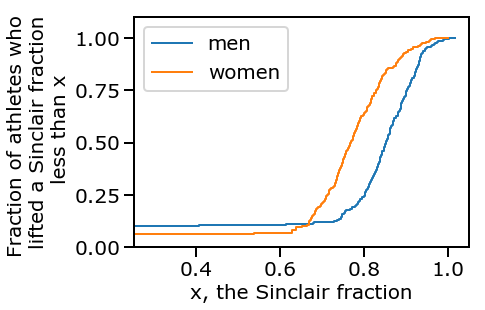

In [16]:
fig, ax1 = plt.subplots()
ax1.step(men_cdf.x, men_cdf.y, label = r'men')
ax1.step(women_cdf.x, women_cdf.y, label = r'women')
ax1.set_xlabel('x, the Sinclair fraction')
ax1.set_ylabel('Fraction of athletes who \n lifted a Sinclair fraction \n less than x')
ax1.set_xlim([0.25, 1.05])
ax1.set_ylim([0, 1.1])
ax1.legend()
plt.show()

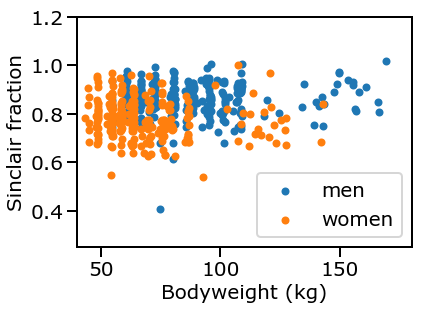

In [17]:
fig, ax1 = plt.subplots()
ax1.scatter(data['bweight'][men], data['sinc_frac'][men], label = r'men')
ax1.scatter(data['bweight'][women], data['sinc_frac'][women], label = r'women')
ax1.set_xlabel('Bodyweight (kg)')
ax1.set_ylabel('Sinclair fraction')
ax1.set_xlim([40, 180])
ax1.set_ylim([0.25, 1.2])
ax1.legend()
plt.show()

In [19]:
top20 = data.sort_values('sinc_frac', ascending = False)[0:20]
top20

,pid,gender,rank,rank_s,rank_cj,name,born,nation,category,bweight,...,jerk1,jerk2,jerk3,jerk,total,event,date,sinclair,sinc_frac,cj_attempt_num
553,553,M,1.0,1.0,1.0,TALAKHADZE Lasha,02.10.1993,GEO,p109,169.31,...,245.0,252.0,257.0,257.0,474,2018 IWF World Championships,11.2018,465.690994,1.017842,3.0
494,494,M,1.0,2.0,1.0,MARTIROSYAN Simon,17.02.1997,ARM,109,109.00,...,230.0,240.0,NaN,240.0,435,2018 IWF World Championships,11.2018,433.162549,1.004242,2.0
438,438,M,1.0,1.0,1.0,MORADI Sohrab,22.09.1988,IRI,96,95.94,...,223.0,230.0,NaN,230.0,416,2018 IWF World Championships,11.2018,414.269369,1.004178,2.0
528,528,W,1.0,1.0,1.0,KASHIRINA Tatiana,24.01.1991,RUS,p87,107.60,...,178.0,182.0,185.0,185.0,330,2018 IWF World Championships,11.2018,330.059027,0.999821,3.0
262,262,M,1.0,1.0,1.0,SHI Zhiyong,10.10.1993,CHN,73,72.81,...,188.0,196.0,NaN,196.0,360,2018 IWF World Championships,11.2018,362.803430,0.992273,2.0
439,439,M,2.0,2.0,2.0,TIAN Tao,08.04.1994,CHN,96,94.44,...,215.0,226.0,NaN,226.0,407,2018 IWF World Championships,11.2018,411.691364,0.988605,2.0
130,130,M,1.0,1.0,1.0,IRAWAN Eko Yuli,24.07.1989,INA,61,60.87,...,165.0,170.0,174.0,174.0,317,2018 IWF World Championships,11.2018,324.144228,0.977960,3.0
320,320,M,1.0,2.0,2.0,LYU Xiaojun,27.07.1984,CHN,81,80.41,...,197.0,202.0,NaN,202.0,374,2018 IWF World Championships,11.2018,382.724068,0.977205,2.0
554,554,M,2.0,2.0,2.0,MINASYAN Gor,25.10.1994,ARM,p109,149.50,...,240.0,245.0,NaN,245.0,450,2018 IWF World Championships,11.2018,462.140080,0.973731,2.0
322,322,M,2.0,1.0,3.0,MAHMOUD Mohamed Ihab Youssef Ahmed,21.11.1989,EGY,81,80.72,...,196.0,200.0,NaN,200.0,373,2018 IWF World Championships,11.2018,383.468168,0.972701,2.0
